# Worksheet 12

Name: Tristan Lee 
UID: U24272030

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

Yes, No, Yes, No

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

I would split the dataset into a training set and testing set. The training set will be used to learn the model, and the testing set will be used to assess the performance. They should also be disjoint so that the model doesn't "cheat" and learn from data it will be tested on.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting refers to when a model does not account for all the actual observed data. An example may be a model that finds a linear equation to represent quadratic data, which wouldn't be able to capture the data well. Many of the data points will not be classified properly. Overfitting refers to when a model accounts for too much of the actual observed data. An example may be a model that finds a quartic equation to represent quadratic data with some noise. The model may go "out of its way" to learn some complex pattern in the data that may actually just be noise.

### K Nearest Neighbors

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

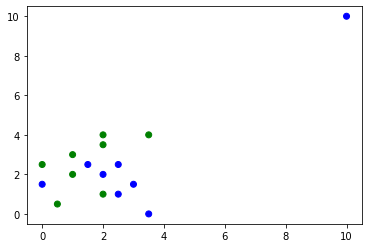

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

The point (10,10) seems to be an outlier, as it's quite far from the other 15 points.

In [3]:
data['Attribute A'].pop()
data['Attribute B'].pop()
data['Class'].pop()

# plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
# plt.show()

0

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

The point (0,1.5) may be a noise point. It's colored blue, but most of the surrounding points are colored green.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

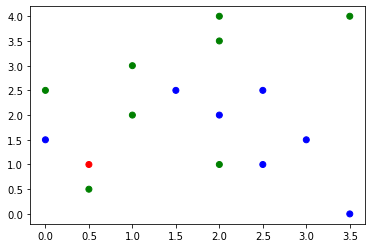

In [4]:
plt.scatter(data['Attribute A'] + [0.5], data['Attribute B'] + [1], color=colors[data["Class"] + [2]].tolist())
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

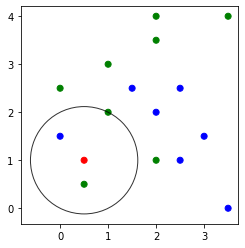

In [5]:
def n_closest_to(example, n):
    points = [(x,y) for x, y in zip(n['Attribute A'], n['Attribute B'])]
    points.sort(key=lambda xy: (xy[0]-example[0])**2 + (xy[1]-example[1])**2)
    return points[:3]

location = ( 0.5 , 1 )
# find the furthest of the closest 3 points
p = n_closest_to((0.5, 1), data)[-1]
radius = ((p[0]-0.5)**2 + (p[1]-1)**2)**0.5
_, axes = plt.subplots()
axes.scatter(data['Attribute A'] + [0.5], data['Attribute B'] + [1], color=colors[data["Class"] + [2]].tolist())
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [6]:
# assuming no duplicate points in the data
def majority(points):
    dataset_dict = {(a,b): c for a,b,c in zip(data['Attribute A'], data['Attribute B'], data['Class'])}
    count_1 = sum([dataset_dict[point] for point in points])
    if count_1 > len(points)/2:
        print(1)
        return 1
    print(0)
    return 0

g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [7]:
count = 0
for i in range(len(data['Class'])):
    actual_class = data["Class"][i]
    training_set = {
        attr: data[attr][:i] + data[attr][i+1:]
        for attr in ['Attribute A', 'Attribute B']
    }
    prediction = majority(n_closest_to((data['Attribute A'][i], data['Attribute B'][i]), training_set))
    if prediction == actual_class:
        count += 1

print("overall accuracy =", count/len(data['Class']))

1
1
0
0
1
1
0
0
1
0
1
0
0
1
1
overall accuracy = 0.7333333333333333


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [14]:
# take just the first 20% of the data because runtime...
X, y = X[:len(X)//5], y[:len(y)//5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    correct = sum(1 if predictions[i]==y_test[i] else 0 for i in range(len(y_test)))
    accuracy = correct/len(y_test)
    accuracies.append(accuracy)

[0.9236607142857143, 0.9071428571428571, 0.9224107142857143, 0.9207142857142857, 0.9210714285714285, 0.9171428571428571, 0.9189285714285714, 0.9167857142857143, 0.91625, 0.9123214285714286, 0.9094642857142857, 0.9085714285714286, 0.9079464285714286, 0.9039285714285714, 0.9014285714285715, 0.8990178571428571, 0.8975, 0.8955357142857143, 0.8947321428571429, 0.89375]


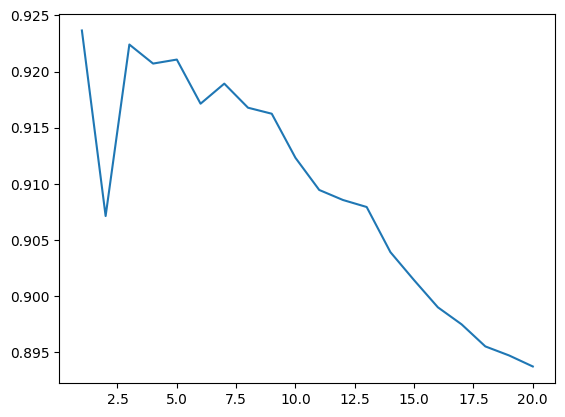

In [23]:
print(accuracies)
plt.plot(range(1, 21), accuracies)

The highest accuracy is attained by k=1, in other words, taking the classification of the single nearest neighbor. This makes sense because most handwritten instances of a digit appear similar, and most digits looks different from the others. Therefore, taking just the closest instance should give an accurate label, while taking more and more neighbors may give labels of other digits.

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

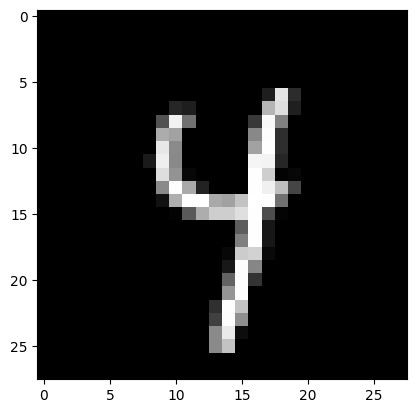

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

rand_index = np.random.randint(len(X_test))
rand_image = X_test[rand_index]

neighbors = knn_model.kneighbors([rand_image])
plt.imshow(rand_image.reshape(28, 28), cmap='gray')

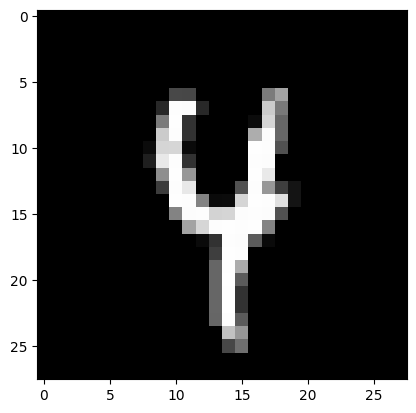

In [36]:
plt.imshow(X_train[neighbors[1][0]].reshape(28, 28), cmap='gray')

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

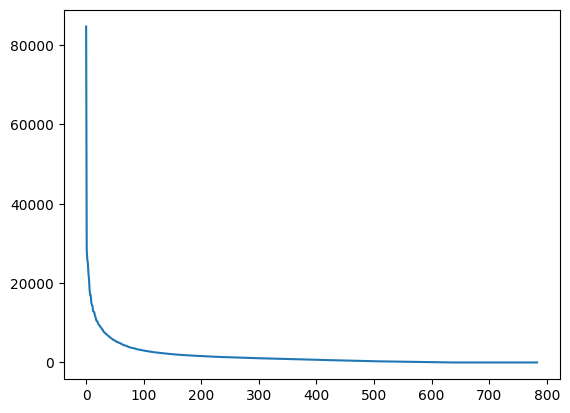

In [38]:
# from sklearn.pipeline import make_pipeline

# model = make_pipeline(dimensionality_reduction, knn_model)
# model.fit(...)

# SVD the training set and plot the singular values
u, s, vt = np.linalg.svd(X_train,full_matrices=False)
plt.plot(s)

In [58]:
ranks = 25
scopy = s[:ranks]
X_train_reduced = u[:, :ranks].dot(np.diag(scopy))

accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    # train on the reduced data
    knn.fit(X_train_reduced, y_train)
    # convert the test data to the reduced dimension
    predictions = knn.predict(X_test.dot(vt.T[:, :ranks]))
    correct = sum(1 if predictions[i]==y_test[i] else 0 for i in range(len(y_test)))
    accuracy = correct/len(y_test)
    accuracies.append(accuracy)

[0.9357142857142857, 0.9257142857142857, 0.9357142857142857, 0.9361607142857142, 0.9333035714285715, 0.9336607142857143, 0.9325, 0.9308928571428572, 0.9296428571428571, 0.9291964285714286, 0.9288392857142858, 0.9273214285714285, 0.9258928571428572, 0.9246428571428571, 0.9229464285714286, 0.9221428571428572, 0.9210714285714285, 0.9198214285714286, 0.9184821428571428, 0.9184821428571428]


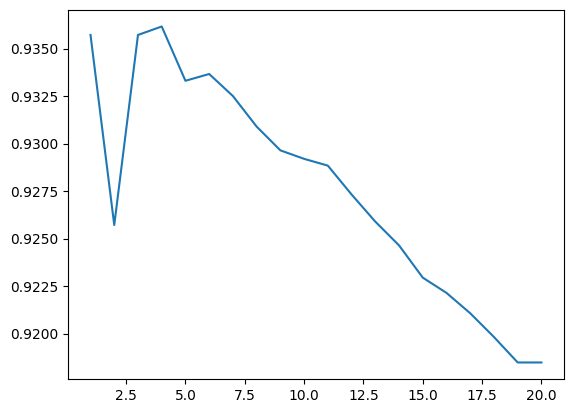

In [59]:
print(accuracies)
plt.plot(range(1, 21), accuracies)

From the plot of the singular values, it looks like keeping just the first 25 singular values is enough to retain most of the information. It may also clear out some noise in the data by reducing the dimension by so much, so we'll use 25.

It looks training on the reduced data increased our accuracy, though not by that much (around 1%). Interestingly, it looks the new best k is 4 in this reduced space. This might be because reducing the dimension cleared out some of the anamolies in the images, meaning the neighbors of a reduced instance are most likely to match the label.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [61]:
import pandas as pd

training_data = pd.read_csv('./titanic/train.csv')

In [71]:
training_data['name_length'] = training_data['Name'].str.len()
training_data['ticket_end'] = training_data['Ticket'].str.split().str[-1]
training_data = training_data.drop(columns=['Name', 'Ticket'])

In [84]:
training_data['Sex'] = training_data['Sex'].map({'male': 0, 'female': 1})

def cabin_mapper(cabin):
    if pd.isna(cabin):
        return cabin
    cabin = cabin.split()[0]
    cabin_level = (ord(cabin[0]) - ord('A')) * 200
    cabin_room = 0 if len(cabin) == 1 else int(cabin[1:])
    return cabin_level + cabin_room
training_data['Cabin'] = training_data['Cabin'].map(cabin_mapper)
training_data['Embarked'] = training_data['Embarked'].map(lambda x: x if pd.isna(x) else {'C': 0, 'Q': 1, 'S': 2}[x])

In [90]:
training_data['ticket_end'] = training_data['ticket_end'].map(lambda x: x if x.isnumeric() else 0)

In [94]:
training_data = training_data.fillna(0)

In [95]:
training_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,name_length,ticket_end
0,1,0,3,0,22.0,1,0,7.2500,0.0,2.0,23,21171
1,2,1,1,1,38.0,1,0,71.2833,485.0,0.0,51,17599
2,3,1,3,1,26.0,0,0,7.9250,0.0,2.0,22,3101282
3,4,1,1,1,35.0,1,0,53.1000,523.0,2.0,44,113803
4,5,0,3,0,35.0,0,0,8.0500,0.0,2.0,24,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0.0,2.0,21,211536
887,888,1,1,1,19.0,0,0,30.0000,242.0,2.0,28,112053
888,889,0,3,1,0.0,1,2,23.4500,0.0,2.0,40,6607
889,890,1,1,0,26.0,0,0,30.0000,548.0,0.0,21,111369


In [96]:
X_train, y_train = training_data.drop(columns=['Survived']), training_data['Survived']

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [97]:
testing_data = pd.read_csv('./titanic/test.csv')

testing_data['name_length'] = testing_data['Name'].str.len()
testing_data['ticket_end'] = testing_data['Ticket'].str.split().str[-1]
testing_data = testing_data.drop(columns=['Name', 'Ticket'])
testing_data['Sex'] = testing_data['Sex'].map({'male': 0, 'female': 1})
testing_data['Cabin'] = testing_data['Cabin'].map(cabin_mapper)
testing_data['Embarked'] = testing_data['Embarked'].map(lambda x: x if pd.isna(x) else {'C': 0, 'Q': 1, 'S': 2}[x])
testing_data['ticket_end'] = testing_data['ticket_end'].map(lambda x: x if x.isnumeric() else 0)
testing_data = testing_data.fillna(0)

In [98]:
testing_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,name_length,ticket_end
0,892,3,0,34.5,0,0,7.8292,0.0,1,16,330911
1,893,3,1,47.0,1,0,7.0000,0.0,2,32,363272
2,894,2,0,62.0,0,0,9.6875,0.0,1,25,240276
3,895,3,0,27.0,0,0,8.6625,0.0,2,16,315154
4,896,3,1,22.0,1,1,12.2875,0.0,2,44,3101298
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0.0,0,0,8.0500,0.0,2,18,3236
414,1306,1,1,39.0,0,0,108.9000,505.0,0,28,17758
415,1307,3,0,38.5,0,0,7.2500,0.0,2,28,3101262
416,1308,3,0,0.0,0,0,8.0500,0.0,2,19,359309


In [99]:
predictions = knn_model.predict(testing_data)

In [100]:
predictions

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [105]:
predictions_df = pd.concat([testing_data['PassengerId'], pd.Series(predictions, name='Survived')], axis=1)

In [106]:
predictions_df

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [107]:
predictions_df.to_csv('./titanic/predictions.csv', index=False)

I added a column for length of each passenger's name. I personally associate long names with middle names and so on with wealthier people, so maybe this can be some kind of proxy for affluence, along with the ticket class and/or fare. I also included the last "word" of the ticket number. The ticket numbers seem to sometimes begin with a symbols like "A/5" preceeding the actual number. I think most of the ticket numbers consist of just the number, so maybe keeping just the number will mean something, though I honetly have no idea. Since I did this, I'll drop Name and Ticket from the data. There were also some columns I had to convert to floats in some way, and I replaced NaNs with 0s just so the KNN could except the input.

10 just seemed like a nice number to use for neighbors; it's high enough to get a reasonable number of neighbors, but low enough to not include too many of the other data points (it's about 1% of the total).

I don't know what a "submission link" is, but I screenshotted by spot on the leaderboard:

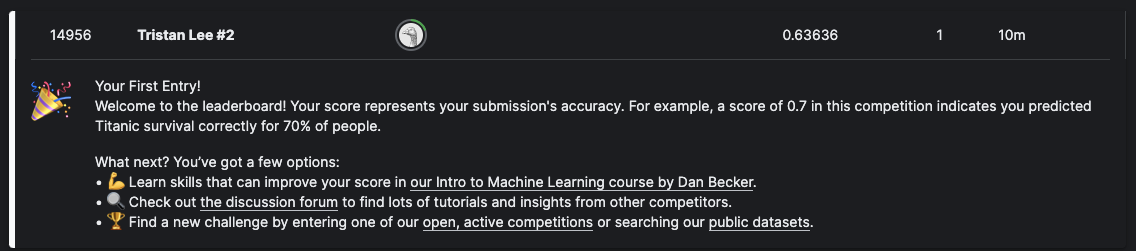

In [108]:
from IPython.display import Image
Image(filename='./titanic/submission.png') 